In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist


In [2]:
ar = 16.0 / 9.0
x_min = -30.0
x_max = 30.0
y_min = x_min / ar
y_max = x_max / ar
nx = 256
ny = 256


V1 = lambda r2: -1.0*np.exp(-0.25*r2)
#V1 = lambda r2: -1.0/(0.125 + r2)**.5

a = 2.0

def potential(x, y):
    return V1((x-a)*(x-a) + y*y) + V1((x+a)*(x+a) + y*y)

t_final = 100.0
skip = 10
dt = 0.01
n_steps = int(np.round(t_final / dt))
ic(n_steps)


sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_potential(potential)
sim.set_grid([x_min, y_min], [x_max, y_max], [nx, ny])
sim.set_ground_state_grid([-15, -10], [15, 10], [128, 128])

sim.set_time_parameters(0.0, t_final, n_steps)

#sim.set_initial_condition(lambda x, y: hermite2d(state_nx, state_ny, x, y))


E0 = 1.0
omega = 0.0
t0 = 0.0
T = 1.0
pol_angle = np.pi / 4
def laser_potential(x,y):
    return np.cos(pol_angle)*x + np.sin(pol_angle)*y

laser = LaserPulse(omega=omega, t0=t0, T=T, E0=E0)

sim.set_laser_potential(laser_potential)
sim.set_laser_pulse(laser)


sim.prepare()


ic| n_steps: 10000
ic| message: 'Dimension set to 2'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 100.0, self.n_steps: 10000
ic| hasattr(self, 'gs'): False
ic| 'computing ground state ... '
ic| 'not using guess for ground state ... '


Initial guess: resid = 65.46787387051361, E = 96.86095808012155
Iteration 0, delta = 1.1305411993810486, resid = 10.727681762785384, E = 3.132385473578114
Iteration 1, delta = 0.6240554915000986, resid = 0.7095606120189342, E = -0.055798679329053
Iteration 2, delta = 0.4305351223445754, resid = 0.27322054924677963, E = -0.4299126168974643
Iteration 3, delta = 0.22547379181838034, resid = 0.11576314205039288, E = -0.5159460914368941
Iteration 4, delta = 0.10608674986125408, resid = 0.05179157602801067, E = -0.5333900151672462
Iteration 5, delta = 0.053983726238465424, resid = 0.026050645578151215, E = -0.5374901636700669
Iteration 6, delta = 0.03182829218347876, resid = 0.015307375952392812, E = -0.538774011139741
Iteration 7, delta = 0.021450057028705324, resid = 0.010302371107497406, E = -0.5393145574406384
Iteration 8, delta = 0.015617514764731232, resid = 0.007496108084982856, E = -0.539590475881706
Iteration 9, delta = 0.011761015225242671, resid = 0.005643026359426746, E = -0.5397

ic| hasattr(self, 'gs'): True


Iteration 95, delta = 4.1603020053335805e-12, resid = 3.911891372837363e-12, E = -0.5399612272129478
Iteration 96, delta = 3.706966934018661e-12, resid = 2.856564178439015e-12, E = -0.5399612272129464
Iteration 97, delta = 2.7999960916158e-12, resid = 2.4763467869345144e-12, E = -0.5399612272129459
Iteration 98, delta = 2.2675365039448044e-12, resid = 1.9357487198472647e-12, E = -0.5399612272129476
Iteration 99, delta = 2.115732746595567e-12, resid = 1.4850519706423188e-12, E = -0.5399612272129495
Iteration 100, delta = 1.4182702092344536e-12, resid = 1.3178739824146697e-12, E = -0.5399612272129465
Iteration 101, delta = 1.3773546146977246e-12, resid = 9.726140942898557e-13, E = -0.5399612272129481
Iteration 102, delta = 9.406274618072324e-13, resid = 8.693596225372116e-13, E = -0.539961227212948
Inverse iterations terminated successfully.


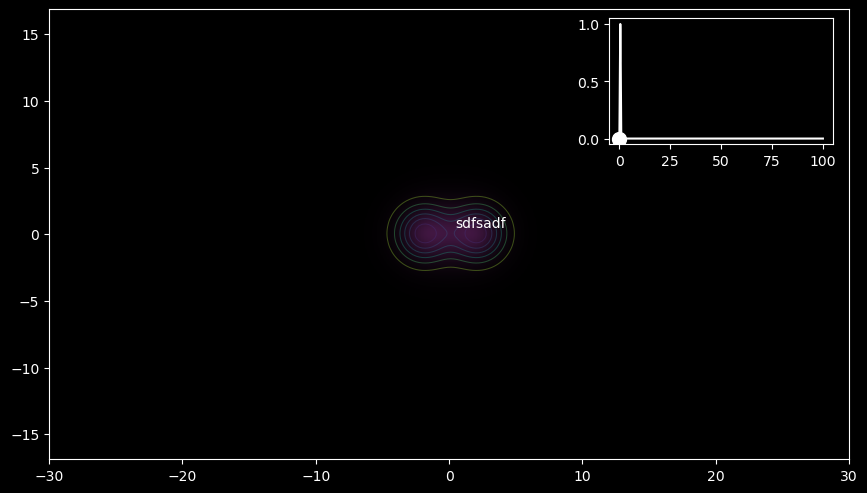

In [25]:
#matplotlib.use('AGG')
%matplotlib inline

def make_fig(sim):
    ar = 16/9
    fig_width = 8
    fig_height = 8 / ar
    show_axis = True
    
        #ic(self.fig_width, self.fig_height, self.fig_width_pixels, self.fig_height_pixels, self.dpi)
        #self.fig, self.ax = plt.subplots(1, 1, figsize=(self.fig_width, self.fig_height))
   # fig = plt.figure(figsize=(fig_width, fig_height))
   # ax = fig.add_subplot(111, axes_class=axisartist.Axes)

    #fig.subplots_adjust(left=0, right=1, top=1, bottom=0) #was plt.subplots_adjust

#    Old:
    fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # add inset axes
    axins_shape = [0.7, 0.7, 0.28, 0.28]
    axins = ax.inset_axes(axins_shape)
    axins.plot(sim.t_grid, sim.laser_pulse_fun(sim.t_grid), color='white')
    laser_dot =  axins.scatter(sim.t, sim.laser_value, color='white', s=100)
    

    if show_axis:    
        pass
    else:
        ax.axis('off')
    
    psi = sim.psi
    
    bmp = phase_mag_vis2(psi.T, cmap=phase_cmap)
    
  
    


    
    image = ax.imshow(
        bmp,
        origin='lower', 
        aspect='equal',
        extent = [x_min, x_max, y_min, y_max]
    )

    ax.set_aspect('equal')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    V = sim.ham.V
    
    im_pot = ax.contour(
        V.T, 
        extent=[x_min, x_max, y_min, y_max],
        linewidths=plt.rcParams['lines.linewidth']/2,
        alpha=0.35
    )
    
    ax.text(0.5, 0.5, 'sdfsadf')

    return fig, ax

plt.style.use('dark_background')
make_fig(sim)
#plt.savefig('fig_0.png', dpi=300)
plt.show()